## mnist 분류

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,10])

In [5]:
w = tf.Variable(tf.random_normal([784,10])) 
b = tf.Variable(tf.random_normal([10]))

In [6]:
hf = tf.nn.softmax(tf.matmul(x,w)+b)

In [7]:
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf), axis=1))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [8]:
isCorrect = tf.equal(tf.argmax(hf,1), tf.argmax(y,1))

In [9]:
accuracy = tf.reduce_mean(tf.cast(isCorrect, tf.float32))

In [10]:
numEpochs = 15
batchSize = 100
numIter = int(mnist.train.num_examples / batchSize)
# 60000 / 100 = 600

에폭:0001, cost:2.826302752
에폭:0002, cost:1.061668976
에폭:0003, cost:0.838061328
에폭:0004, cost:0.733232746
에폭:0005, cost:0.669279894
에폭:0006, cost:0.624611839
에폭:0007, cost:0.591160358
에폭:0008, cost:0.563868996
에폭:0009, cost:0.541745189
에폭:0010, cost:0.522673595
에폭:0011, cost:0.506782334
에폭:0012, cost:0.492447652
에폭:0013, cost:0.479955845
에폭:0014, cost:0.468893677
에폭:0015, cost:0.458703488
정확도: 0.8951
레이블: [1]
예측: 0


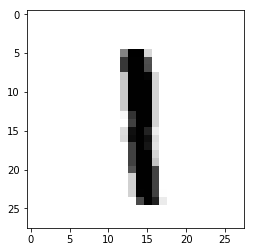

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #트레이닝
    for epoch in range(numEpochs): #15에폭만큼 반복
        avgCv = 0
        for i in range(numIter): #반복 횟수: 600
            batchX, batchY = mnist.train.next_batch(batchSize)
            _, cv = sess.run([train, cost], feed_dict={x:batchX, y:batchY})
            avgCv+=cv/numIter
        print("에폭:{:04d}, cost:{:.9f}" .format(epoch+1, avgCv))
    print("정확도:", accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    r = random.randint(0,mnist.test.num_examples-1)
    print("레이블:",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("예측:", sess.run(tf.argmax(tf.argmax(hf,1)), feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
              cmap='Greys')
    plt.show()

### 학습 모델 저장/불러오기 (keras)

#### 다층 퍼셉트론 모델

In [15]:
# 훈련셋,검증셋,시험셋
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation
import numpy as np

Using TensorFlow backend.


In [16]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [17]:
#전처리(스케일링)
xTrain = xTrain.reshape(60000,784).astype("float32")/255.0
xTest = xTest.reshape(10000,784).astype("float32")/255.0

In [18]:
#원핫인코딩
yTrain = np_utils.to_categorical(yTrain)
yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
yTest = np_utils.to_categorical(yTest)
yTest

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
xVal = xTrain[42000:]
xTrain = xTrain[:42000]
yVal = yTrain[42000:]
yTrain = yTrain[:42000]

In [21]:
#모델 구성
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
#학습 환경 설정(compile)
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#학습(fit)
model.fit(xTrain ,yTrain, epochs=5, batch_size=50, validation_data=(xVal, yVal))




Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 29us/step - loss: 1.0003 - accuracy: 0.7444 - val_loss: 0.5205 - val_accuracy: 0.8702
Epoch 2/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.4540 - accuracy: 0.8806 - val_loss: 0.3925 - val_accuracy: 0.8926
Epoch 3/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.3753 - accuracy: 0.8965 - val_loss: 0.3477 - val_accuracy: 0.9027
Epoch 4/5
42000/42000 [==============================] - 1s 28us/step - loss: 0.3393 - accuracy: 0.9045 - val_loss: 0.3233 - val_accuracy: 0.9099
Epoch 5/5
42000/42000 [==============================] - 1s 27us/step - loss: 0.3167 - accuracy: 0.9106 - val_loss: 0.3074 - val_accuracy: 0.9123


In [23]:
#모델 평가하기(test data)
metrics = model.evaluate(xTest, yTest, batch_size=50)
print("평가 결과:"+str(metrics))

10000/10000 [==============================] - 0s 13us/step
평가 결과:[0.2958790455106646, 0.9162999987602234]


In [24]:
idx = np.random.choice(xTest.shape[0],5)
xHat = xTest[idx]
yHat = model.predict_classes(xHat)

In [25]:
# print("예측값:", yHat) 

for i in range(5):
    print("예측값:", yHat[i], "실제값:",np.argmax(yTest[idx[i]]))

예측값: 9 실제값: 9
예측값: 0 실제값: 0
예측값: 5 실제값: 5
예측값: 3 실제값: 3
예측값: 4 실제값: 4


In [26]:
"""
모델: 모델 아키텍처와 모델 가중치로 구성
모델 아키텍처: 모델이 어떤 층으로 구성
모델 가중치: weight, bias

save(): 케라스 모델 저장 함수(아키텍처+가중치)
파일 형식: "h5"로 저장
"""

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [27]:
#실제 데이터 사용
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTest = xTest.reshape(10000,784).astype("float32")/255.0
yTest = np_utils.to_categorical(yTest)
idx = np.random.choice(xTest.shape[0], 10)
xhat = xTest[idx]

#모델 불러오기
from keras.models import load_model
model = load_model("mnist_model.h5")
yhat = model.predict_classes(xhat)
for i in range(10):
    print("예측값:", yhat[i], "실제값:",np.argmax(yTest[idx[i]]))

예측값: 1 실제값: 8
예측값: 8 실제값: 8
예측값: 4 실제값: 4
예측값: 2 실제값: 2
예측값: 0 실제값: 0
예측값: 0 실제값: 0
예측값: 1 실제값: 1
예측값: 1 실제값: 1
예측값: 3 실제값: 3
예측값: 7 실제값: 7


In [28]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [29]:
xdata = xy[:,0:-1]
ydata = xy[:,[-1]]

In [30]:
x = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,1])

In [31]:
w = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

In [32]:
hf = tf.matmul(x,w)+b

In [33]:
cost = tf.reduce_mean(tf.square(hf-y))

In [34]:
train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [35]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [36]:
for step in range(101):
    cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:xdata, y:ydata})
    print(step, "cost:", cv, "\nPrediction:", hv)

0 cost: 2805202400000.0 
Prediction: [[1181228.4]
 [2380427.5]
 [1872087.9]
 [1311611.6]
 [1546225.9]
 [1559265.9]
 [1428939.6]
 [1819987. ]]
1 cost: 3.0820206e+27 
Prediction: [[-3.9160576e+13]
 [-7.8834251e+13]
 [-6.2016065e+13]
 [-4.3472929e+13]
 [-5.1235172e+13]
 [-5.1666410e+13]
 [-4.7354049e+13]
 [-6.0291119e+13]]
2 cost: inf 
Prediction: [[1.2980300e+21]
 [2.6130676e+21]
 [2.0556058e+21]
 [1.4409688e+21]
 [1.6982587e+21]
 [1.7125526e+21]
 [1.5696137e+21]
 [1.9984303e+21]]
3 cost: inf 
Prediction: [[-4.3024952e+28]
 [-8.6613651e+28]
 [-6.8135829e+28]
 [-4.7762850e+28]
 [-5.6291076e+28]
 [-5.6764866e+28]
 [-5.2026963e+28]
 [-6.6240668e+28]]
4 cost: inf 
Prediction: [[1.4261201e+36]
 [2.8709260e+36]
 [2.2584539e+36]
 [1.5831641e+36]
 [1.8658435e+36]
 [1.8815480e+36]
 [1.7245038e+36]
 [2.1956361e+36]]
5 cost: inf 
Prediction: [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 cost: nan 
Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
7 cost: nan 

In [37]:
xy.shape

(8, 5)

In [38]:
def myMinMax(data):
#     print(np.min(data)) #전체에서 최소값
#     print(np.min(data, axis=1)) #행 단위로 최소값
#     print(np.min(data, axis=0)) #열 단위로 최소값
    
    bj = data-np.min(data,0)
    bm = np.max(data,0)-np.min(data,0)
    
    return bj/bm
    
xy = myMinMax(xy)
    

In [39]:
xdata = xy[:,0:-1]
ydata = xy[:,[-1]]

In [40]:
x = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.matmul(x,w)+b
cost = tf.reduce_mean(tf.square(hf-y))
train = tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [41]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(101):
    cv, hv, _ = sess.run([cost, hf, train], feed_dict={x:xdata, y:ydata})
    print(step, "cost:", cv, "\nPrediction:", hv)
    
# 1. 역정규화를 하여 예측 종가를 출력
# 1.874 => xxxx??

0 cost: 2.8398445 
Prediction: [[-1.1070918 ]
 [-1.9613767 ]
 [-1.3061585 ]
 [-0.6469848 ]
 [-0.91904765]
 [-0.9656548 ]
 [-0.4581895 ]
 [-1.0235589 ]]
1 cost: 2.8396354 
Prediction: [[-1.1070079 ]
 [-1.961294  ]
 [-1.3060904 ]
 [-0.6469325 ]
 [-0.91898537]
 [-0.96559453]
 [-0.45814943]
 [-1.023519  ]]
2 cost: 2.839426 
Prediction: [[-1.106924  ]
 [-1.9612117 ]
 [-1.306022  ]
 [-0.64688015]
 [-0.91892296]
 [-0.96553427]
 [-0.45810938]
 [-1.0234792 ]]
3 cost: 2.839217 
Prediction: [[-1.1068401 ]
 [-1.9611291 ]
 [-1.3059537 ]
 [-0.6468278 ]
 [-0.9188607 ]
 [-0.9654741 ]
 [-0.45806932]
 [-1.0234394 ]]
4 cost: 2.8390074 
Prediction: [[-1.1067562 ]
 [-1.9610466 ]
 [-1.3058853 ]
 [-0.6467755 ]
 [-0.9187984 ]
 [-0.9654138 ]
 [-0.45802927]
 [-1.0233996 ]]
5 cost: 2.8387983 
Prediction: [[-1.1066723 ]
 [-1.9609642 ]
 [-1.3058171 ]
 [-0.6467233 ]
 [-0.91873604]
 [-0.96535355]
 [-0.45798925]
 [-1.0233598 ]]
6 cost: 2.8385892 
Prediction: [[-1.1065885 ]
 [-1.9608817 ]
 [-1.3057487 ]
 [-0.64667094]

In [42]:
# xor 문제를 텐서플로우로 구현
# 단일, 멀티 퍼셉트론으로 각각 구현

In [43]:
xdata = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])
ydata = np.array([[0],
                  [1],
                  [1],
                  [0]])

# 트레이닝 횟수: 10000번, lr=0.1
# 예측값 출력
# 0 0 => 0
# 0 1 => 1
# 1 0 => 1
# 1 1 => 0

In [44]:
#단일 퍼셉트론
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

hf= tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv, wv = sess.run(
                  [train, cost, w], feed_dict={x: xdata, y: ydata}
        )
        if step % 100 == 0:
            print(step, cv, wv)

    h, c, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.9704803 [[ 2.6448982]
 [-0.7425397]]
100 0.7636306 [[ 1.4069557]
 [-0.5645426]]
200 0.7167489 [[ 0.8209853 ]
 [-0.26290193]]
300 0.7009397 [[ 0.4813193 ]
 [-0.10296428]]
400 0.6957976 [[ 0.2844251]
 [-0.0285488]]
500 0.694093 [[0.17008142]
 [0.00275338]]
600 0.6935029 [[0.10305049]
 [0.01364038]]
700 0.6932878 [[0.06326947]
 [0.01550194]]
800 0.6932051 [[0.03934456]
 [0.01382597]]
900 0.6931718 [[0.0247607 ]
 [0.01112823]]
1000 0.69315785 [[0.01575332]
 [0.00847066]]
1100 0.69315195 [[0.01012043]
 [0.00622993]]
1200 0.6931493 [[0.00655714]
 [0.00447879]]
1300 0.6931481 [[0.00427958]
 [0.00316928]]
1400 0.69314766 [[0.00281043]
 [0.00221729]]
1500 0.6931473 [[0.00185521]
 [0.00153836]]
1600 0.69314724 [[0.0012299 ]
 [0.00106064]]
1700 0.69314724 [[0.00081822]
 [0.00072781]]
1800 0.6931472 [[0.00054592]
 [0.00049763]]
1900 0.6931472 [[0.00036508]
 [0.00033929]]
2000 0.6931472 [[0.0002446 ]
 [0.00023082]]
2100 0.6931472 [[0.00016411]
 [0.00015675]]
2200 0.6931472 [[0.00011024]
 [0.000

In [45]:
#멀티레이어 퍼셉트론 기반 
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

# 1 히든 레이어
w1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.random_normal([2]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

# 2 히든 레이어
w2 = tf.Variable(tf.random_normal([2, 2]))
b2 = tf.Variable(tf.random_normal([2]))
layer2 = tf.sigmoid(tf.matmul(layer1, w2) + b2)

# 출력 레이어
w3 = tf.Variable(tf.random_normal([2, 1]))
b3 = tf.Variable(tf.random_normal([1]))
hf = tf.sigmoid(tf.matmul(layer2, w3) + b3)

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv = sess.run([train, cost], feed_dict={x: xdata, y: ydata})
        if step % 100 == 0:
            print(step, cv)

    h, p, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nPredicted: ", p, "\nAccuracy: ", a)
    
##Hypothesis:  [[0.01254793]

#  [0.9882984 ]
#  [0.9834779 ]
#  [0.01068014]] 

0 0.9094985
100 0.69084346
200 0.6903068
300 0.6897783
400 0.6892062
500 0.6885794
600 0.687885
700 0.6871079
800 0.6862302
900 0.68523
1000 0.68408096
1100 0.68275017
1200 0.6811969
1300 0.67937136
1400 0.6772116
1500 0.67464304
1600 0.6715776
1700 0.66791475
1800 0.6635477
1900 0.65837276
2000 0.65230584
2100 0.6453041
2200 0.6373872
2300 0.62865335
2400 0.619282
2500 0.60951865
2600 0.59964275
2700 0.5899286
2800 0.5806098
2900 0.57185787
3000 0.5637762
3100 0.55640864
3200 0.54975176
3300 0.54377174
3400 0.53841627
3500 0.533625
3600 0.5293356
3700 0.52548814
3800 0.522027
3900 0.5189017
4000 0.5160675
4100 0.5134839
4200 0.5111152
4300 0.5089297
4400 0.50689834
4500 0.50499433
4600 0.5031921
4700 0.5014665
4800 0.49979177
4900 0.49813908
5000 0.49647585
5100 0.4947612
5200 0.4929419
5300 0.49094433
5400 0.48866135
5500 0.48593122
5600 0.48249885
5700 0.47795892
5800 0.47168112
5900 0.46279332
6000 0.4504392
6100 0.4343348
6200 0.41464272
6300 0.3910601
6400 0.36309463
6500 0.33103

In [46]:
# wide & deep

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
layer2 = tf.nn.relu(tf.matmul(layer1, w2) + b2)

w3 = tf.Variable(tf.random_normal([10, 10]))
b3 = tf.Variable(tf.random_normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2, w3) + b3)

w4 = tf.Variable(tf.random_normal([10, 1]))
b4 = tf.Variable(tf.random_normal([10]))
hf = tf.sigmoid(tf.matmul(layer3, w4) + b4)
# tf.nn.relu

cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hf > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cv, wv = sess.run([train, cost, w], feed_dict={x: xdata, y: ydata})
#         if step % 100 == 0:
#             print(step, cv, wv)

    h, c, a = sess.run([hf, predicted, accuracy], feed_dict={x: xdata, y: ydata})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


Hypothesis:  [[1.14172697e-04 2.49445438e-05 1.69277191e-05 2.95937061e-05
  3.93390656e-06 1.82390213e-05 5.27501106e-05 1.74045563e-05
  9.20891762e-06 6.37769699e-06]
 [9.99998450e-01 9.99992847e-01 9.99989271e-01 9.99993861e-01
  9.99954164e-01 9.99990046e-01 9.99996603e-01 9.99989569e-01
  9.99980330e-01 9.99971390e-01]
 [9.99998271e-01 9.99991775e-01 9.99987900e-01 9.99993205e-01
  9.99948263e-01 9.99988735e-01 9.99996185e-01 9.99988198e-01
  9.99977827e-01 9.99967635e-01]
 [8.64267349e-05 1.89244747e-05 1.27851963e-05 2.24411488e-05
  2.98023224e-06 1.37984753e-05 3.99649143e-05 1.31726265e-05
  7.03334808e-06 4.79817390e-06]] 
Correct:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 
Accuracy:  1.0


In [47]:
# keras.io
# Dense 검색
# Dense(8, input_dim=4, init='uniform', activation='relu')
# Dense(1, input_dim=3, init='uniform', activation='sigmoid') 
# Dense(10, input_dim=4, activation='softmax')
#...

# model = Sequential()
# model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
# model.add(Dense(1, input_dim=3, init='uniform', activation='sigmoid'))
# model.add(Dense(10, input_dim=4, activation='softmax'))

In [48]:
# 1. mnist - 90% 정확도 넘게... (텐서플로우)
# 2. pima indiams diabetes

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [335]:
data = pd.read_csv("dataset (1)/pima-indians-diabetes.csv", header=None)
data

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [336]:
xdata = data.loc[:,:7] #(768, 8)
ydata = data.loc[:,[8]].values #(768, 1)
xdata.shape

(768, 8)

In [337]:
#정규화

scaler = StandardScaler()
scaler.fit(xdata)
xdata = scaler.transform(xdata)
xdata

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [338]:
# train/test set 나누기

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, random_state=42, train_size=0.7)

In [339]:
x = tf.placeholder(tf.float32, shape=[None,8])
y = tf.placeholder(tf.float32, shape=[None,1])

w = tf.Variable(tf.random_normal([8,1]))
b = tf.Variable(tf.random_normal([1]))

In [340]:
hf = tf.sigmoid(tf.matmul(x,w)+b)

In [341]:
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [342]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [343]:
predicated = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicated,y), dtype=tf.float32))

In [344]:
ytest.shape[0]

231

In [345]:
import pandas as pd

In [353]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1001):
        _, cv = sess.run([train, cost], feed_dict={x:xtrain, y:ytrain})
    
    res = sess.run(hf, feed_dict={x:xtest})
    
    prediction = list(map(lambda x:x.item(),sess.run(tf.cast(res>0.5, dtype=tf.float32))))
    label = list(map(lambda x:x.item(), ytest))
    
    df = pd.DataFrame({"예측결과":prediction, "정답":label})
    display(df)
                    
#     print("예측 결과: ", sess.run(tf.cast(res>0.5, dtype=tf.float32)))
#     print("정답:", ytest)
    print("정확도: ", sess.run(accuracy, feed_dict={x:xtest, y:ytest}))
        

,예측결과,정답
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
226,1.0,1
227,0.0,1
228,0.0,0
229,0.0,0


정확도:  0.7619048
